# Original data

Red areas in plot have abs correlation with either EOG channels > 0.5 

C:\Users\Lima\Anaconda3\lib\site-packages\ipykernel\__main__.py:26: FutureWarning: pd.rolling_corr is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(min_periods=100,window=6144,center=True).corr(other=<Series>)
C:\Users\Lima\Anaconda3\lib\site-packages\ipykernel\__main__.py:27: FutureWarning: pd.rolling_corr is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(min_periods=100,window=6144,center=True).corr(other=<Series>)


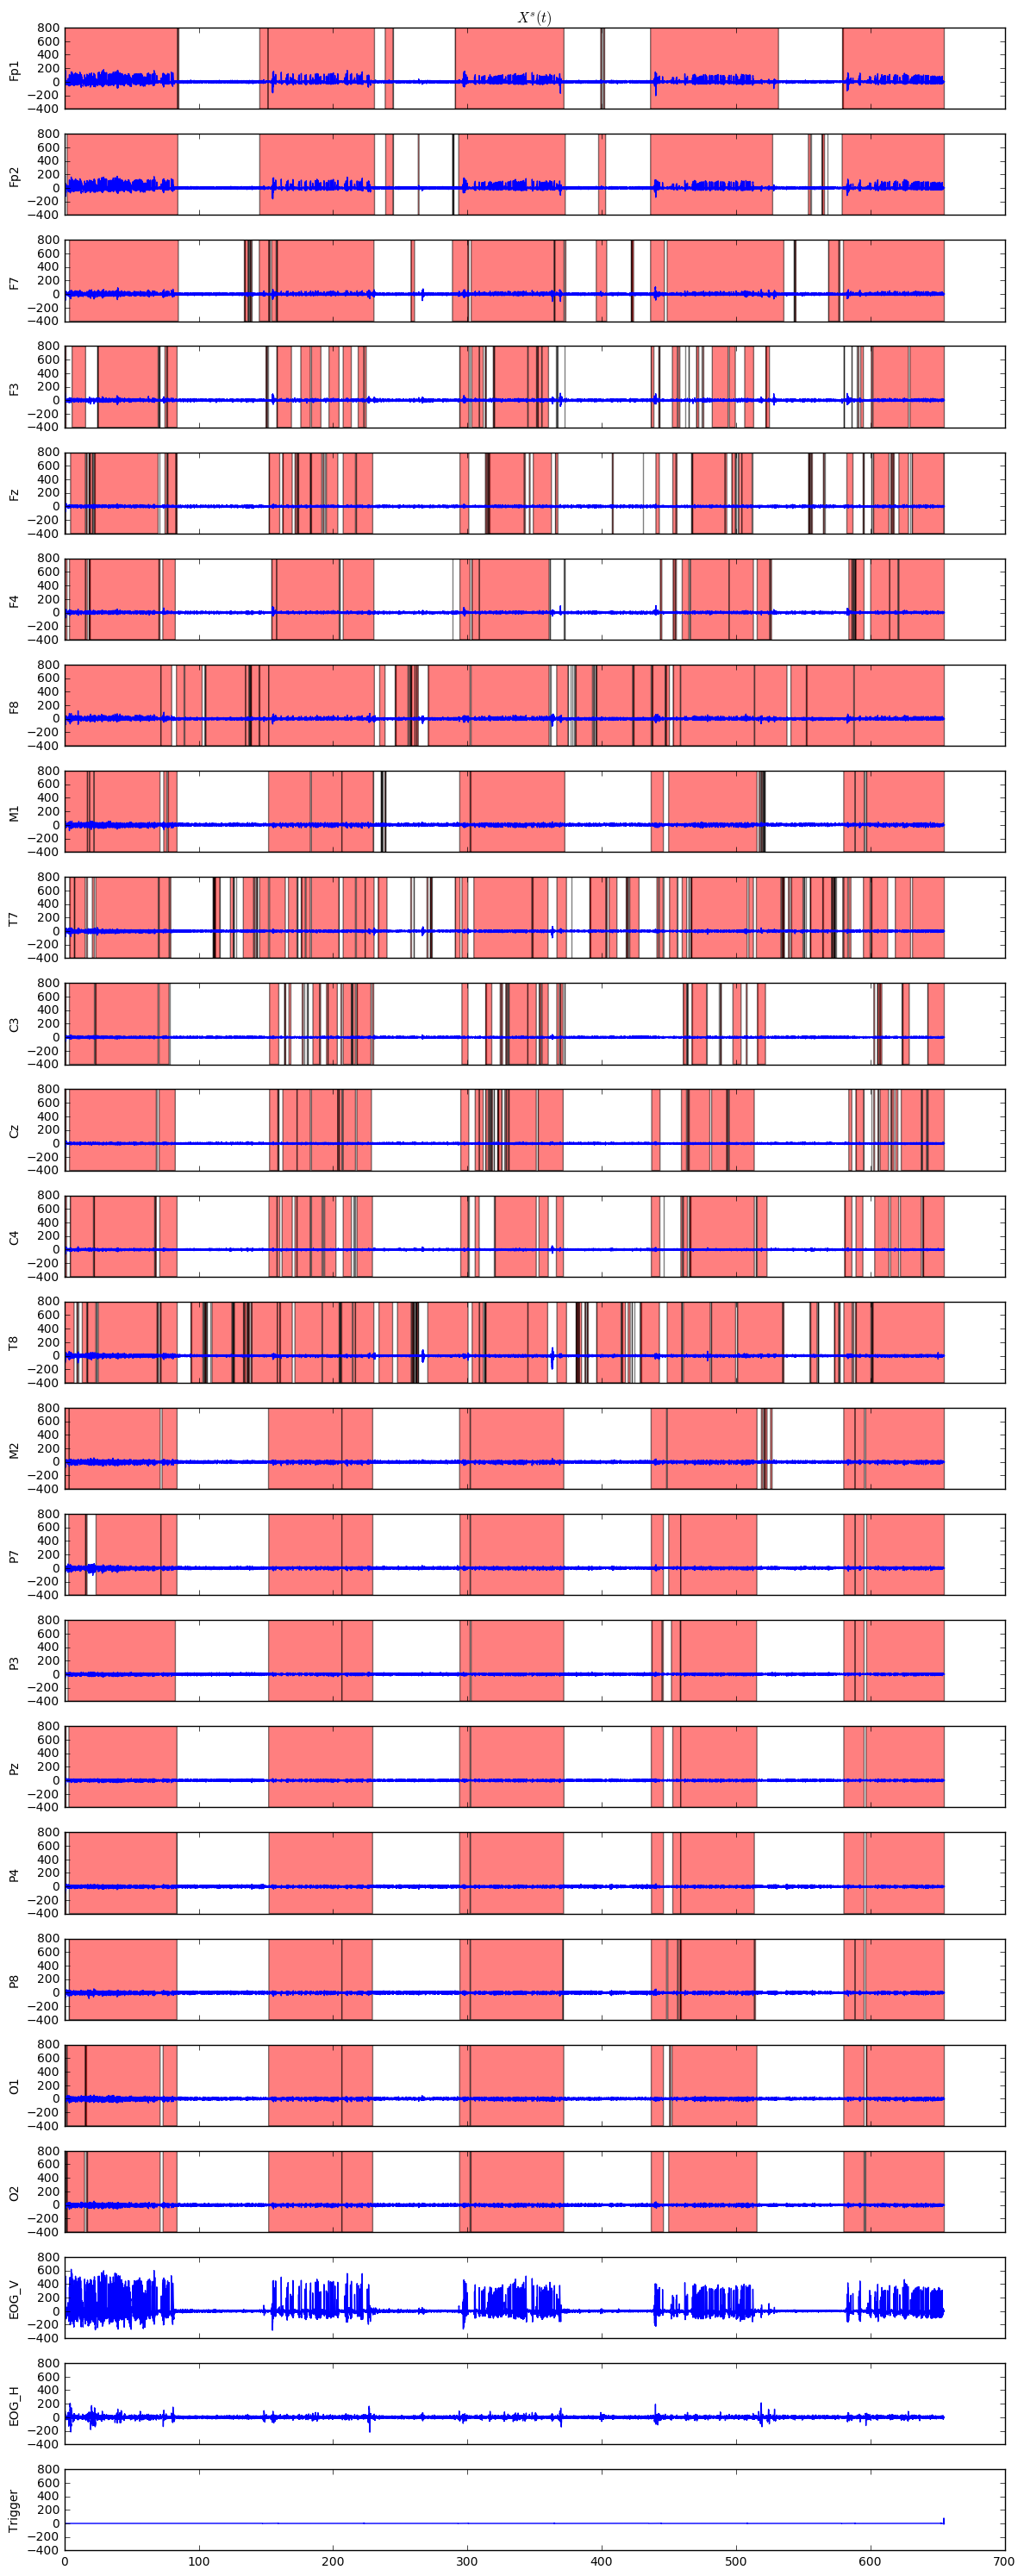

corr EOG_H,Fp1 = 0.7036995540492904
corr EOG_H,Fp2 = 0.7312851126877841
corr EOG_H,F7 = 0.4639935838303811
corr EOG_H,F3 = 0.4226000066543235
corr EOG_H,Fz = 0.4598216939698692
corr EOG_H,F4 = 0.4973471304487444
corr EOG_H,F8 = 0.5011384809501053
corr EOG_H,M1 = -0.5116781108178912
corr EOG_H,T7 = -0.38017455488140467
corr EOG_H,C3 = -0.2763121454096346
corr EOG_H,Cz = -0.28455486612417447
corr EOG_H,C4 = -0.3147312493020392
corr EOG_H,T8 = -0.36965134604821653
corr EOG_H,M2 = -0.5916531206282649
corr EOG_H,P7 = -0.5143124819729052
corr EOG_H,P3 = -0.5087672478721871
corr EOG_H,Pz = -0.5243699862788196
corr EOG_H,P4 = -0.5202255523008715
corr EOG_H,P8 = -0.534253061105212
corr EOG_H,O1 = -0.5324285832086493
corr EOG_H,O2 = -0.5528861152105131

corr EOG_V,Fp1 = 0.19827061245976443
corr EOG_V,Fp2 = -0.002861462815202234
corr EOG_V,F7 = 0.4882379828884796
corr EOG_V,F3 = 0.23321041906414214
corr EOG_V,Fz = 0.040218274251802535
corr EOG_V,F4 = -0.15226482174107747
corr EOG_V,F8 = -0.378360

In [5]:
import sys
sys.path.append('C:/Users/Lima/Desktop/EEG data (test data RJ)/SOBI_TestData/SOBI_TestData')

import PEEG_Analyse2 as pa
import SOBI as sobi
from scipy import signal
import matplotlib.transforms as mtransforms
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import rolling_corr

file='C:/Users/Lima/Desktop/EEG data (test data RJ)/SOBI_TestData/SOBI_TestData/S0002O01M01_pEEG_CHDR1633_13OCT2017_125357.EDF'
peeg = pa.PEEG_Analyse2(file)
X = peeg.readSignals()

def corr(X,idx_h,idx_v):
    n_signals = len(X)
    ts = len(X.T)
    corrH = np.zeros([n_signals-3,ts])
    corrV = np.zeros([n_signals-3,ts])
    EOG_H = pd.Series(X[idx_h])
    EOG_V = pd.Series(X[idx_v])
    for sign in range(n_signals-3):
        sig = pd.Series(X[sign])
        corrH[sign] = rolling_corr(EOG_H,sig,6*1024,min_periods=100,center=True).values
        corrV[sign] = rolling_corr(EOG_V,sig,6*1024,min_periods=100,center=True).values 
    del EOG_H
    del EOG_V
    del sig
    return corrH,corrV


def annotate(X,idx_h,idx_v,ccoef=0.5):
    corr_H,corr_V = corr(X,idx_h,idx_v)
    OA = ((abs(corr_H) > ccoef) | (abs(corr_V) > ccoef))
    return OA

def show_OA(peeg, X,OA):
    plt.close('all')
    f, axarr = plt.subplots(peeg.nSignals, 1, figsize=(12,30),sharex=True, sharey=True)
    plt.subplots_adjust(wspace=0.05, hspace = 0.3)
    t = np.arange(0, peeg.nSamples[0]/peeg.fs[0], peeg.Ts[0]) 
    axarr[0].set_title('$X^s(t)$')
    for i in range(peeg.nSignals):
        axarr[i].set_ylabel(peeg.signalLabels[i])
        axarr[i].plot(t, X[i])
        if(i < 21):
            trans = mtransforms.blended_transform_factory(axarr[i].transData, axarr[i].transAxes)
            axarr[i].fill_between(t, 0, 1, where=OA[i,:], facecolor='red', alpha=0.5, transform=trans)
    f.tight_layout()
    plt.show()

corrH,corrV = corr(X,21,22)
OA = annotate(X,21,22)
show_OA(peeg,X,OA)

print(*['corr EOG_H,{} = {}'.format(peeg.signalLabels[i],np.mean(corrH,1)[i]) for i in range(21)],sep='\n')
print()
print(*['corr EOG_V,{} = {}'.format(peeg.signalLabels[i],np.mean(corrV,1)[i]) for i in range(21)],sep='\n')

# Cleaned data

Takes a while now because cross_correlation is slow for long signals. Will be better if we epoch first. 

670721
(23, 23)
--- 1.28 seconds diagonalizing ---
(23, 23)
--- 0.22 seconds diagonalizing ---
--- 147.38 seconds total ---


C:\Users\Lima\Anaconda3\lib\site-packages\ipykernel\__main__.py:26: FutureWarning: pd.rolling_corr is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(min_periods=100,window=6144,center=True).corr(other=<Series>)
C:\Users\Lima\Anaconda3\lib\site-packages\ipykernel\__main__.py:27: FutureWarning: pd.rolling_corr is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(min_periods=100,window=6144,center=True).corr(other=<Series>)


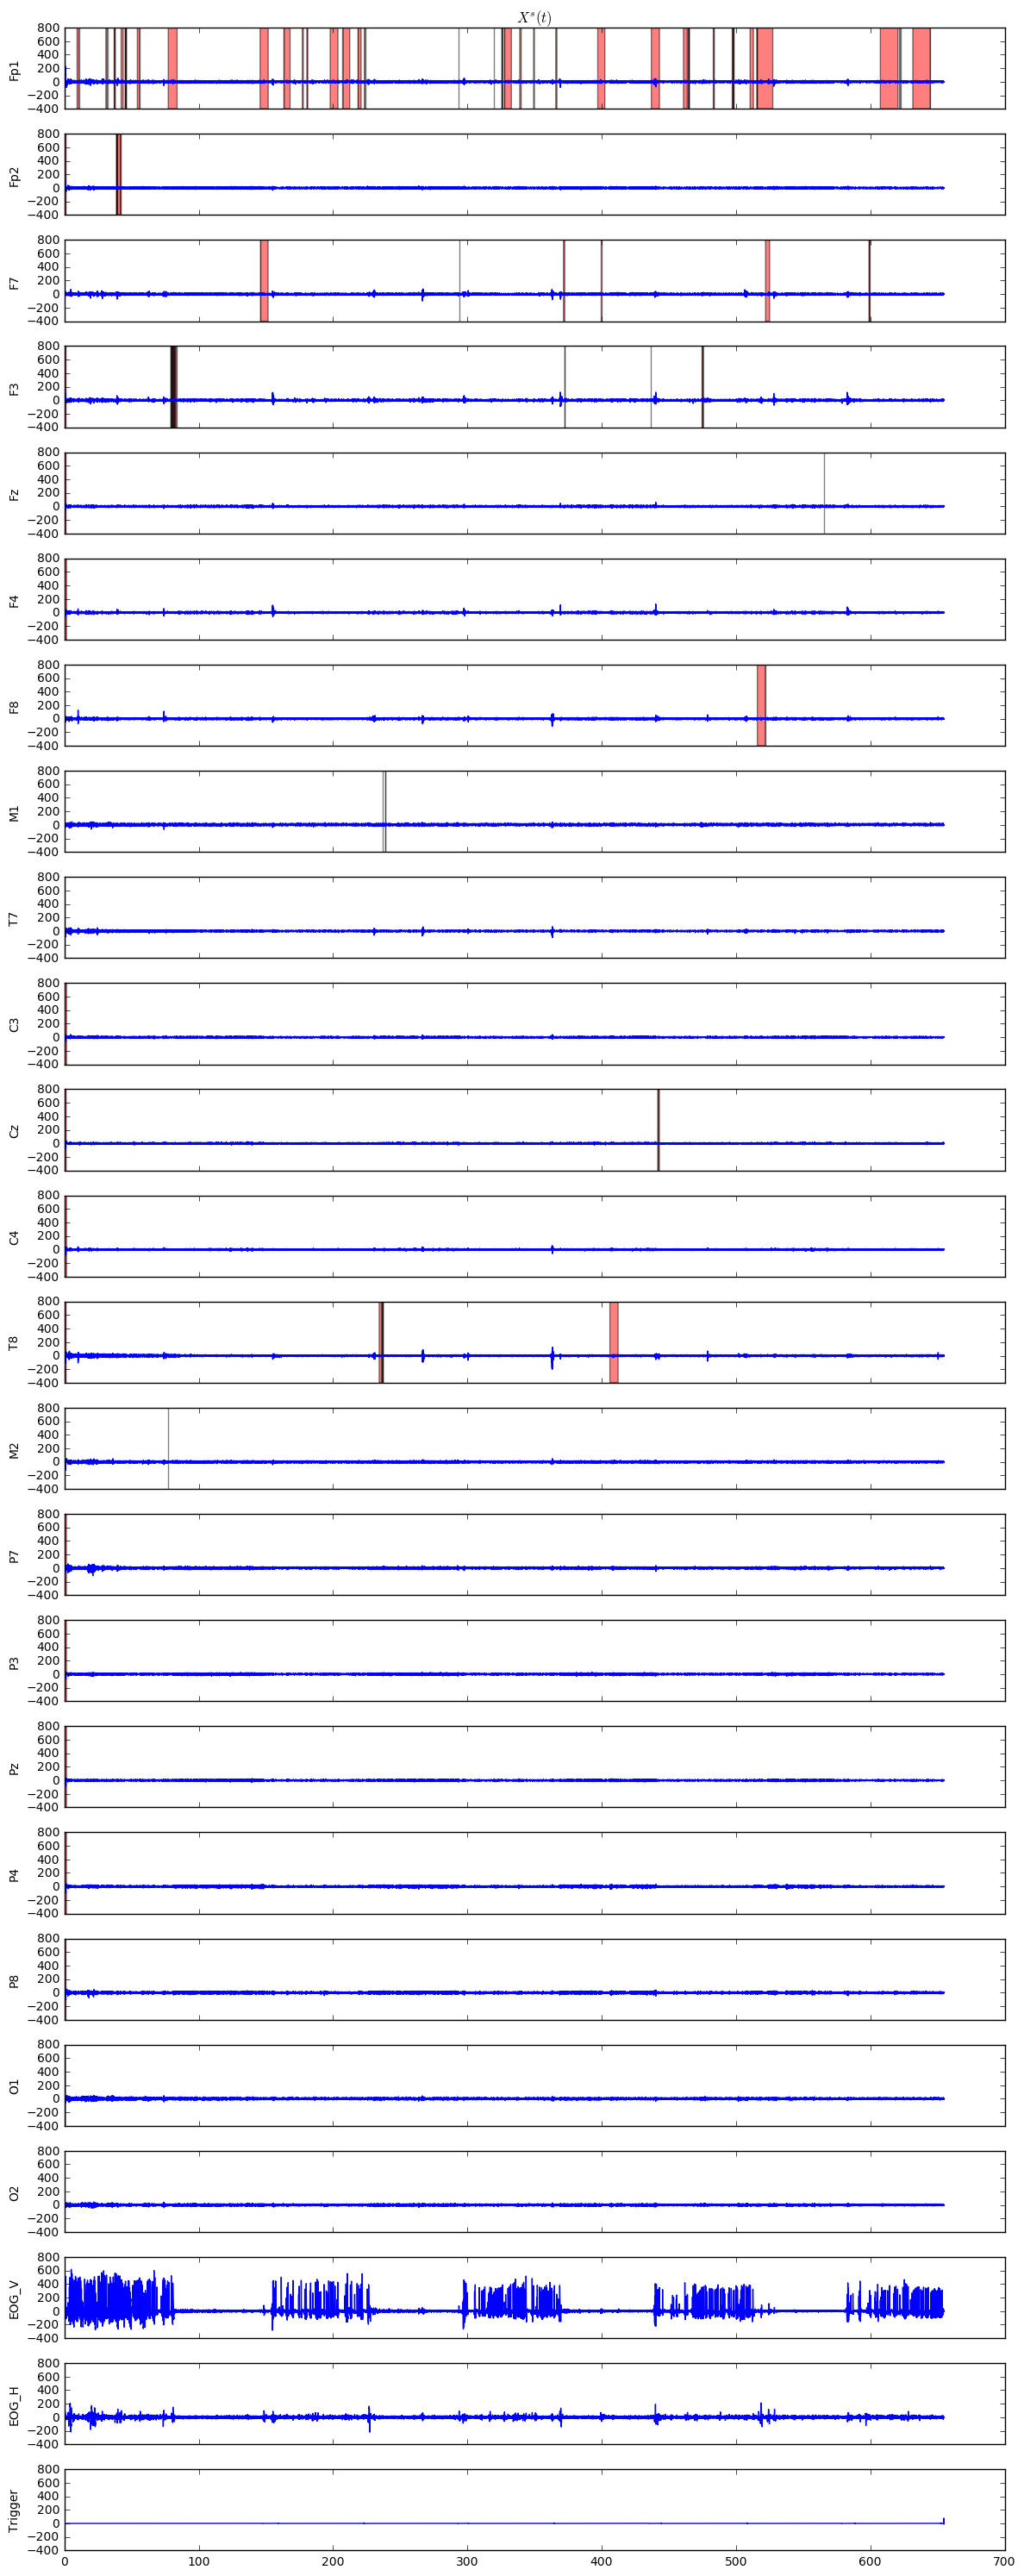

corr EOG_H,Fp1 = 0.24008626600626556
corr EOG_H,Fp2 = 0.18800791160553332
corr EOG_H,F7 = 0.050348355059175016
corr EOG_H,F3 = 0.18873141709773653
corr EOG_H,Fz = 0.05885060006084171
corr EOG_H,F4 = 0.06685026567120061
corr EOG_H,F8 = -0.016000052996015465
corr EOG_H,M1 = -0.019984283463253334
corr EOG_H,T7 = -0.1308224469012853
corr EOG_H,C3 = -0.0702624137732981
corr EOG_H,Cz = -0.0591639685015197
corr EOG_H,C4 = -0.04553050172523462
corr EOG_H,T8 = -0.11332765248321296
corr EOG_H,M2 = -0.1835437110049897
corr EOG_H,P7 = -0.11987535022439842
corr EOG_H,P3 = -0.11757538960196139
corr EOG_H,Pz = -0.14408678211300244
corr EOG_H,P4 = -0.17073672008823332
corr EOG_H,P8 = -0.1808656438960361
corr EOG_H,O1 = -0.1125391001822505
corr EOG_H,O2 = -0.08909716893712745
corr EOG_V,Fp1 = 0.1386270287985777
corr EOG_V,Fp2 = -0.05248872798832972
corr EOG_V,F7 = 0.04926567126922112
corr EOG_V,F3 = 0.12370927678047162
corr EOG_V,Fz = -0.09794676076678689
corr EOG_V,F4 = -0.13814501202847337
corr EOG_V

In [8]:
import time
import SOBI as sobi

#with Jacobi angles diagonalizer
start_time = time.time()
sobi_J = sobi.SOBI(X[0:23],[21,22],eps=1e-2)
Xc = np.zeros_like(X)
Xc[:21] = sobi_J.Xc[:21]
Xc[21:24] = X[21:24]
print("--- {:.2f} seconds total ---".format(time.time() - start_time))

corrH,corrV = corr(Xc,21,22)
OA = annotate(Xc,21,22)
show_OA(peeg,Xc,OA)

print(*['corr EOG_H,{} = {}'.format(peeg.signalLabels[i],np.mean(corrH,1)[i]) for i in range(21)],sep='\n')

print(*['corr EOG_V,{} = {}'.format(peeg.signalLabels[i],np.mean(corrV,1)[i]) for i in range(21)],sep='\n')


